<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

-how to generate a classification model
-how to resolve problem of overfitting using dropout and early stopping rate

Early stopping rate
Keras has in-built early stopping rate, based on the loss condition calculated on t**he validation dataset **passed during the model.fit().

Dropout rate
Dropout layers can be added to the models to turn off neurons to prevent overfitting. Turns off user defined % of neurons in previous layer, weights and biases of these neurons do not get affected.

Dataset - classification of tumours to benign tumour vs metastatic

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info() #check for any null values, no null values is good as shown below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe() #check stat features, transpose with index being a feature as well

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

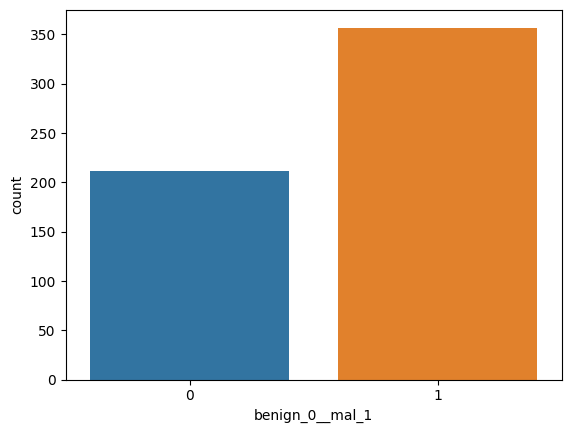

In [ ]:
sns.countplot(x='benign_0__mal_1', data=df) #always great to use countplot to see instances of your label
#well balanced problem, benign is assigned 0 and malicious is 1

Seems quite well balanced, more cases of malicious than benign. Check correlation between features

<Axes: >

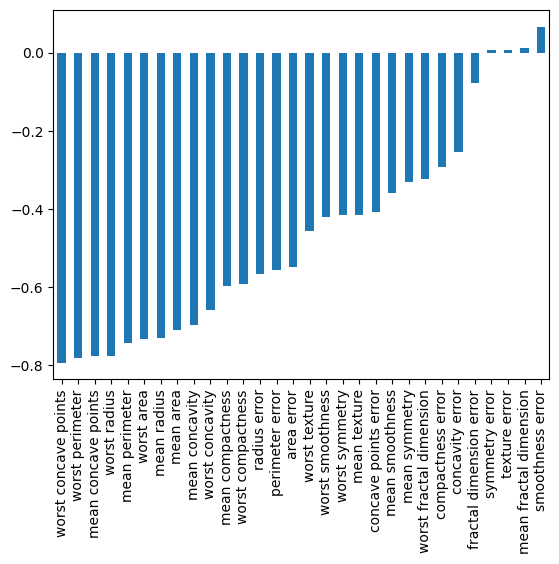

In [ ]:
#check correlation with label in mind, sort values by highest corr and lowest
#then plot, kind is bar plot, label perfectly correlated with each other
#grab everything but label correlated with itself, -1 inddex
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

Everything is strongly negatively correlated with the label, which should allow for a good prediction to be made. Look at correlation between features themselves with heatmap, every feature compared with other feature.

<Axes: >

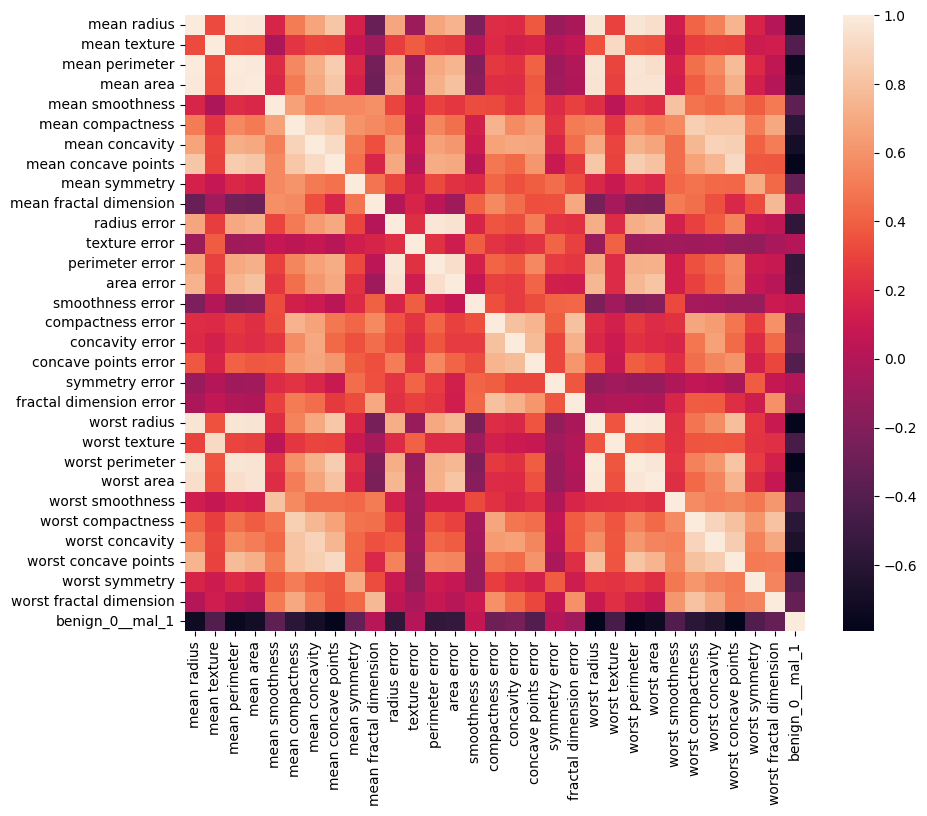

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

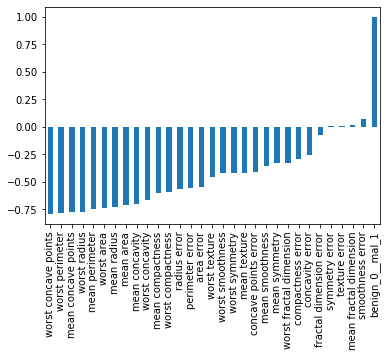

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

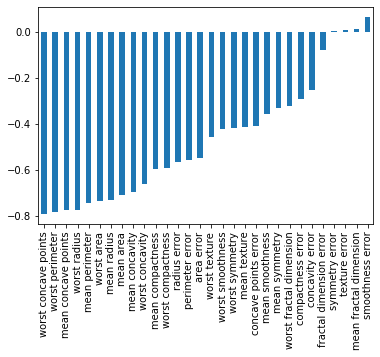

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

Split dataset into training and test datasets. For training remove the label

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values #keeping values only
#axis=1 so column
y = df['benign_0__mal_1'].values #grab values

In [ ]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
#remember to split into test and train datasets
#smaller dataset so test will only be 25% of the entire dataset


## Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#create instance of the scaler
scaler = MinMaxScaler()

In [45]:
X_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [48]:
X_test = X_test.reshape(-1,1)

In [46]:
X_train = scaler.fit_transform(X_train)
#transform data
#same with test, but onsteadd of fit transform just transform


In [52]:
X_test = scaler.fit_transform(X_test) #worked only with fit_transform 
#not with scaler.transform as in the course

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: ignored

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Dense,Dropout,Activation

ImportError: ignored

In [55]:
X_train.shape #dataset has 30 features

(426, 30)

In [56]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model = Sequential()
#30 neurons for 30 features, activation of rectified linear unit
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
#binary classification problem, last layer is 1 neuron with sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))
#always last activation must be sigmoid
#final neuron will output either 0 or 1 and assign to benign or malignant
#compile, use binary crossentropy for loss function for classification
#use adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [57]:
#choose too many epochs as 600, see overfitting
#also insert validation dataset, will take a while
model.fit(X_train, y_train, epochs=600,
          validation_data=(X_test, y_test))

ValueError: ignored

In [62]:
X_test.shape

(426, 1)

In [63]:
y_test.shape

(143,)

In [64]:
X_train.shape

(426, 30)

In [65]:
y_train.shape

(143, 30)

In [69]:
X_test2 = X_test[:143,:]
X_train2 = X_train[:143,:]

In [70]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train2, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test2, y_test),
          verbose=1
          )

Epoch 1/600


TypeError: ignored

In [ ]:
# model.history.history

Remember that you will have to plot both the training loss and the validation loss. 

In [ ]:
model_loss = pd.DataFrame(model.history.history)

Get a dataframe with validation and training losses. Plot, simple case of overfitting to the training dataset, training loss in blue still goes down, however validation loss starts to increase.
Training for too many epochs.
Use early stopping rate, stop training before it gets out of hand. Use keras callbacks, first example.
Recreate the model instead, 

In [ ]:
# model_loss.plot()

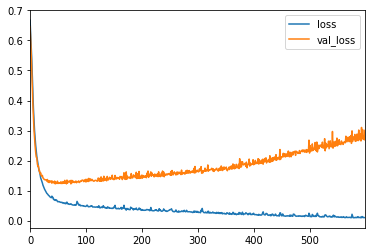

In [ ]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [71]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

Not the only comeback to be used, EarlyStopping, check documentation.
Choose metric to check and base early stopping on, in this case val_loss (orange on plot). 
Min change to require
patience - number of epochs that can go on without any change in the loss metric
Some noise during training, line is composed of many datapoints at every epoch, up/down trend
different modes of training


Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [ ]:
#define early stop variable first
#mode, what are you trying to achieve through early stopping
#max mode - if metric is accuracy, then maximise it and stop when it's max
#min mode - we want to minimise our val_loss
#automode automatically determines the best direction of training
#but if it does not work do it manually, what you know about metric that is tracked
#val_loss=0 is perfect fit, verbose=1 - see report
#patience=25, wait 25 epochs, accomodates for noise
#
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [74]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [75]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          #in model fit function add argument callbacks and use your callback variable
          #pass it as a list, even if just 1
          callbacks=[early_stop]
          )

#scroll down, early stop, stopped training after 81 epochs, choose large number of epochs
#and then stop early with callbacks, takes care of that automatically

ValueError: ignored

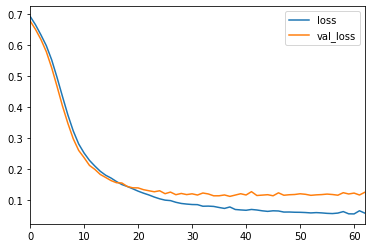

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

#checking model loss, ideal plot, both loss and val_loss decrease
#good indication of where to stop training

## Example Three: Adding in DropOut Layers

In [ ]:
from tensorflow.keras.layers import Dropout
#remember it comes from layers 

In [ ]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
#add dropout layer, shift tab, main parameter is rate of % of turned
#off neurons, 0 - none, 1 - all neurons for every batch of training
#good % is 0.2-0.5, not specified batch size so 0.5
#between 2 layers and between N-1 and N layers
#each neuron has 50% chance of being turned off
#use with combination of early stopping
model.add(Dropout(0.5))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6894 - val_loss: 0.6833
Epoch 2/600
426/426 [==============================] - 0s 101us/sample - loss: 0.6828 - val_loss: 0.6722
Epoch 3/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6817 - val_loss: 0.6584
Epoch 4/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6626 - val_loss: 0.6439
Epoch 5/600
426/426 [==============================] - 0s 97us/sample - loss: 0.6450 - val_loss: 0.6319
Epoch 6/600
426/426 [==============================] - 0s 101us/sample - loss: 0.6343 - val_loss: 0.6138
Epoch 7/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6207 - val_loss: 0.5962
Epoch 8/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6005 - val_loss: 0.5744
Epoch 9/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5897 - val_loss: 0.5444
Epoch 10/600


426/426 [==============================] - 0s 98us/sample - loss: 0.1228 - val_loss: 0.1019
Epoch 79/600
426/426 [==============================] - 0s 103us/sample - loss: 0.1097 - val_loss: 0.0958
Epoch 80/600
426/426 [==============================] - 0s 104us/sample - loss: 0.1086 - val_loss: 0.0939
Epoch 81/600
426/426 [==============================] - 0s 102us/sample - loss: 0.1100 - val_loss: 0.0974
Epoch 82/600
426/426 [==============================] - 0s 107us/sample - loss: 0.1394 - val_loss: 0.0995
Epoch 83/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1069 - val_loss: 0.0951
Epoch 84/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1095 - val_loss: 0.0961
Epoch 85/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1262 - val_loss: 0.0995
Epoch 86/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1187 - val_loss: 0.1073
Epoch 87/600
426/426 [==============================] - 0s 9

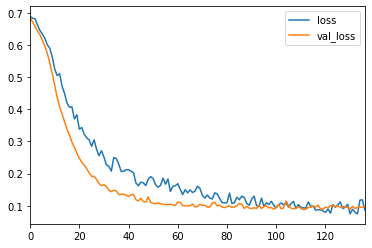

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

Both dropout and early stopping should help reduce overfitting.
Look at the model above, has run for longer, thats good as it could learn from the dataset for longer. 
Plot model history, even better, training and validation loss quickly down and flatten at the same rate.
Much improved over what we saw earlier, adding dropout and callbacks has significantly increased performance.

Classification task, get 0 or 1, use model.predict_classes

In [ ]:
#pass in test dataset from y, shows classes
#new tumour, still assigned a class
predictions = model.predict_classes(X_test)

In [ ]:
#2 things to import from sklearn for classification models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#precision, recall and f-1 score, printout classification report
#predict directly against predictions
print(classification_report(y_test, predictions))
#get good performance

In [ ]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
#print confusion matrix
print(confusion_matrix(y_test, predictions))
#only misclassified 1 datapoint in our predictions dataset against true labels
#might have more, should get 0.95 or more for accuracy and precision and recall
#accuracy is a good metric, well balanced classes, not unbalanced

In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
